<a href="https://colab.research.google.com/github/abdulsamadkhan/LLM/blob/main/HugggingFaceIntroduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Behind the pipeline (PyTorch)

### Objectives:

1. Understand the concept of pipelines in HuggingFace and their role in simplifying NLP tasks.
2. Learn how to use the tokenizer provided by HuggingFace to preprocess text data for NLP models.
3. Familiarize yourself with pre-trained models available in HuggingFace and their applications in NLP tasks.
4. Gain experience in making predictions using HuggingFace models for tasks such as sentiment analysis, text generation, or named entity recognition.




Install the Transformers, Datasets, and Evaluate libraries to run this notebook.

In [2]:
!pip install datasets evaluate transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 115.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

# Pipleline:
**What is pipeline**

It is a high-level interface that combines multiple natural language processing (NLP) components into a single workflow. It provides a convenient and streamlined way to perform various NLP tasks, such as text classification, named entity recognition, question-answering, etc. A pipeline typically consists of a tokenizer and a model, and it simplifies the process of feeding input text and obtaining output predictions.
![image](https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter2/full_nlp_pipeline.svg) [image huggingFace]

Let's consider a sentiment analysis pipeline. You can use the HuggingFace library to create a sentiment analysis pipeline that takes in a text and predicts the sentiment associated with it. Here's an example of how you can use the pipeline:

In [3]:
from transformers import pipeline

# Create a sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Use the pipeline to predict sentiment for a given text
result = sentiment_pipeline("I really enjoyed the movie!")

print(result)


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


[{'label': 'POSITIVE', 'score': 0.9998713731765747}]


# Tokenizer
A tokenizer is a crucial component of NLP models that breaks down raw text into smaller units, called tokens. These tokens are the basic building blocks that the model operates on. Tokenization can involve splitting text into words, subwords, or characters, depending on the tokenizer's configuration. It also handles special tokens like punctuation marks, symbols, and unknown words. Tokenization is an important preprocessing step as it enables the model to process text input effectively.

![image.png]()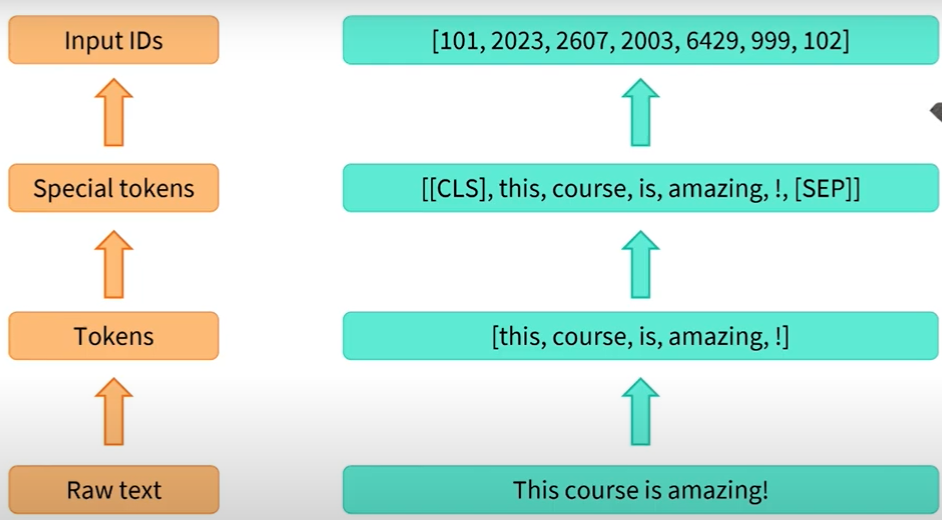

In [4]:
from transformers import BertTokenizer

# Instantiate the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the sentence
tokens = tokenizer.tokenize("Hello, how are you?")

print(tokens)


['hello', ',', 'how', 'are', 'you', '?']


In [5]:
raw_inputs = "I am teaching at BUITEMS"
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)

{'input_ids': tensor([[  101,  1045,  2572,  4252,  2012, 20934,  4221,  5244,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])}


### Tokenization Techniques
* #### Tokenization
 Tokenization breaks down the text into smaller units, such as words, subwords, or characters. Here are a few ways tokenization can be performed:
 - ### Word-based
![image](https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter2/word_based_tokenization.svg)

 - ### Character Wise
 ![image](https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter2/character_based_tokenization.svg)
 - ### Subword Level
 ![image](https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter2/bpe_subword.svg)

In [10]:
#step1 : Tokenization
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]
tokens = tokenizer.tokenize(raw_inputs[0])
print(tokens)

#step2: tokens are mapped to ids
ids = tokenizer.convert_tokens_to_ids(tokens)
print(ids)

#mapping the ids back to string
decoded_string = tokenizer.decode(ids)
print(decoded_string)


['i', "'", 've', 'been', 'waiting', 'for', 'a', 'hugging', '##face', 'course', 'my', 'whole', 'life', '.']
[1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012]
i've been waiting for a huggingface course my whole life.


# Model
A model refers to a pre-trained neural network that has been trained on large amounts of text data. These models are designed to perform specific NLP tasks, such as text generation, sentiment analysis, or machine translation. HuggingFace offers a wide range of pre-trained models, including state-of-the-art models like BERT, GPT, and RoBERTa. These models are capable of understanding the nuances of natural language and can be fine-tuned on specific datasets for more targeted applications.

In [11]:
#Let's consider an example of using a pre-trained GPT-2 model from HuggingFace for text generation.
#We can use the model to generate a continuation of a given prompt. Here's an example:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Instantiate the GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Generate text based on a prompt
prompt = "Once upon a time"
input_ids = tokenizer.encode(prompt, return_tensors='pt')
output = model.generate(input_ids, max_length=50, num_return_sequences=1)

generated_text = tokenizer.decode(output[0])

print(generated_text)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Once upon a time, the world was a place of great beauty and great danger. The world was a place of great danger, and the world was a place of great danger. The world was a place of great danger, and the world was a


# Prediction
It refers to the output generated by a model when given a specific input. For example, if you have a sentiment analysis model and provide it with a sentence like "I loved the movie," the prediction might be "positive." The prediction is typically the model's best guess at the desired output based on the learned patterns in the training data. It could be a single label or a probability distribution over multiple labels, depending on the task and model configuration

In [12]:
# Let's consider an example of using a pre-trained BERT model for named entity recognition (NER). Given the sentence "Apple Inc. was founded by Steve Jobs and Steve Wozniak,"
#we can use the model to predict the named entities. Here's an example:
from transformers import pipeline

# Create a named entity recognition pipeline
ner_pipeline = pipeline("ner")

# Use the pipeline to predict named entities in a sentence
result = ner_pipeline("Apple Inc. was founded by Steve Jobs and Steve Wozniak.")

print(result)




No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'entity': 'I-ORG', 'score': 0.9996643, 'index': 1, 'word': 'Apple', 'start': 0, 'end': 5}, {'entity': 'I-ORG', 'score': 0.9995709, 'index': 2, 'word': 'Inc', 'start': 6, 'end': 9}, {'entity': 'I-PER', 'score': 0.9988042, 'index': 7, 'word': 'Steve', 'start': 26, 'end': 31}, {'entity': 'I-PER', 'score': 0.99926084, 'index': 8, 'word': 'Job', 'start': 32, 'end': 35}, {'entity': 'I-PER', 'score': 0.9858824, 'index': 9, 'word': '##s', 'start': 35, 'end': 36}, {'entity': 'I-PER', 'score': 0.99888605, 'index': 11, 'word': 'Steve', 'start': 41, 'end': 46}, {'entity': 'I-PER', 'score': 0.99909055, 'index': 12, 'word': 'W', 'start': 47, 'end': 48}, {'entity': 'I-PER', 'score': 0.70144594, 'index': 13, 'word': '##oz', 'start': 48, 'end': 50}, {'entity': 'I-PER', 'score': 0.7694929, 'index': 14, 'word': '##nia', 'start': 50, 'end': 53}, {'entity': 'I-PER', 'score': 0.97621435, 'index': 15, 'word': '##k', 'start': 53, 'end': 54}]
